<a href="https://colab.research.google.com/github/gar22891uvg/ProyectoFinalGRP4/blob/main/GRP4ProyectoFinal_JAG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
!pip list -v

Package                       Version               Location                                Installer
----------------------------- --------------------- --------------------------------------- ---------
absl-py                       1.4.0                 /usr/local/lib/python3.10/dist-packages pip
aiohttp                       3.8.4                 /usr/local/lib/python3.10/dist-packages pip
aiosignal                     1.3.1                 /usr/local/lib/python3.10/dist-packages pip
alabaster                     0.7.13                /usr/local/lib/python3.10/dist-packages pip
albumentations                1.2.1                 /usr/local/lib/python3.10/dist-packages pip
altair                        4.2.2                 /usr/local/lib/python3.10/dist-packages pip
anyio                         3.6.2                 /usr/local/lib/python3.10/dist-packages pip
appdirs                       1.4.4                 /usr/local/lib/python3.10/dist-packages pip
argon2-cffi                 

In [34]:
!pip install pystan==2.18.0.0
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.5/17.5 MB 58.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for pystan
  Running setup.py clean for pystan
Failed to build pystan
ERROR: Could not build wheels for pystan, which is required to install pyproject.toml-based projects
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached fbprophet-0.7.1.tar.gz (64 kB)
  Preparing metadata (setup.py) ... done
  Using cached cmdstanpy-0.9.5-py3-none-any.whl (37 kB)
  Using cached setuptools_git-1.2-py2.py3-none-any.whl (10 kB)
  error: subprocess-exited-with-error


In [31]:
!pip install pystan

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [36]:
import prophet

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
# Python
from prophet import Prophet

Proyecto Final
Grupo 4
Feature Engineering
Victor De Leon
Jaime Garcia


In [111]:
df = pd.read_csv('REC4.csv',parse_dates=True)

In [112]:
df.head(5)

,FECHA,NOMBRE,CODIGO,TRAFICO,CANT,DELAY
0,01-Nov-22,Internac,1,13997,1157375,155
1,01-Nov-22,direct1,2,9666,168465,163
2,01-Nov-22,dist1,3,9172,137949,164
3,01-Nov-22,digi1,4,3494,83306,154
4,01-Nov-22,online2,6,3251,80198,100


In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5175 entries, 0 to 5174
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   FECHA    5175 non-null   object
 1   NOMBRE   5175 non-null   object
 2   CODIGO   5175 non-null   int64 
 3   TRAFICO  5175 non-null   int64 
 4   CANT     5175 non-null   int64 
 5   DELAY    5175 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 242.7+ KB


In [114]:
df = pd.read_csv('REC4.csv',parse_dates=True,index_col=0)

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5175 entries, 2022-11-01 to 2023-05-12
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   NOMBRE   5175 non-null   object
 1   CODIGO   5175 non-null   int64 
 2   TRAFICO  5175 non-null   int64 
 3   CANT     5175 non-null   int64 
 4   DELAY    5175 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 242.6+ KB


In [116]:
df = df.sort_index()
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5175 entries, 2022-11-01 to 2023-05-12
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   NOMBRE   5175 non-null   object
 1   CODIGO   5175 non-null   int64 
 2   TRAFICO  5175 non-null   int64 
 3   CANT     5175 non-null   int64 
 4   DELAY    5175 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 242.6+ KB


In [117]:
df.head(5)

,NOMBRE,CODIGO,TRAFICO,CANT,DELAY
FECHA,,,,,
2022-11-01,Internac,1,13997,1157375,155
2022-11-01,direct1,2,9666,168465,163
2022-11-01,dist1,3,9172,137949,164
2022-11-01,digi1,4,3494,83306,154
2022-11-01,online2,6,3251,80198,100


In [118]:
df.index.year.unique()

Int64Index([2022, 2023], dtype='int64', name='FECHA')

In [119]:
df.head(5)

,NOMBRE,CODIGO,TRAFICO,CANT,DELAY
FECHA,,,,,
2022-11-01,Internac,1,13997,1157375,155
2022-11-01,direct1,2,9666,168465,163
2022-11-01,dist1,3,9172,137949,164
2022-11-01,digi1,4,3494,83306,154
2022-11-01,online2,6,3251,80198,100


In [140]:
df_int = df[df.NOMBRE=='Internac'][['NOMBRE','CODIGO','TRAFICO','CANT','DELAY']] # let's focus on Internac
df_int ['traff_x1000']= df_int.TRAFICO/1000 # transform 
df_int ['qty_x1000']= df_int.CANT/1000 # transform 
df_int['part_of_the_week']=df_int.index.weekday.map(lambda x: 'Weekday' if x<5 else 'Weekend')
df_int['part_of_the_week_2']=df_int.index.weekday.map(lambda x: 'Promo_day' if x == 0 or x > 3 else 'Normal_day')
df_int['day']=df_int.index.day_name()
df_int['month_name'] = df_int.index.month_name() 
df_int['year'] = df_int.index.year

In [141]:
df_int.index.duplicated().sum()

0

In [142]:
df_int

,NOMBRE,CODIGO,TRAFICO,CANT,DELAY,traff_x1000,qty_x1000,part_of_the_week,part_of_the_week_2,day,month_name,year
FECHA,,,,,,,,,,,,
2022-11-01,Internac,1,13997,1157375,155,13.997,1157.375,Weekday,Normal_day,Tuesday,November,2022
2022-11-02,Internac,1,12754,1062818,187,12.754,1062.818,Weekday,Normal_day,Wednesday,November,2022
2022-11-03,Internac,1,12441,1040217,165,12.441,1040.217,Weekday,Normal_day,Thursday,November,2022
2022-11-04,Internac,1,23045,1800050,145,23.045,1800.050,Weekday,Promo_day,Friday,November,2022
2022-11-05,Internac,1,21942,1830014,162,21.942,1830.014,Weekend,Promo_day,Saturday,November,2022
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-08,Internac,1,21585,1748671,180,21.585,1748.671,Weekday,Promo_day,Monday,May,2023
2023-05-09,Internac,1,14133,1193611,184,14.133,1193.611,Weekday,Normal_day,Tuesday,May,2023
2023-05-10,Internac,1,14426,1215262,209,14.426,1215.262,Weekday,Normal_day,Wednesday,May,2023


In [143]:
df_int.drop(['NOMBRE','CODIGO','CANT','DELAY','traff_x1000','qty_x1000','part_of_the_week', 'part_of_the_week_2', 'day','month_name', 'year'],axis=1, inplace=True)
df_int.columns = ['TRAFICO']

In [144]:
df_int

,TRAFICO
FECHA,
2022-11-01,13997
2022-11-02,12754
2022-11-03,12441
2022-11-04,23045
2022-11-05,21942
...,...
2023-05-08,21585
2023-05-09,14133
2023-05-10,14426


In [145]:
m = Prophet(interval_width=0.95, daily_seasonality=True)
model = m.fit(df_int)

ValueError: ignored

In [14]:
sns.set_style("darkgrid") # Others whitegrid, white, dark, ticks https://www.python-graph-gallery.com/104-seaborn-themes 

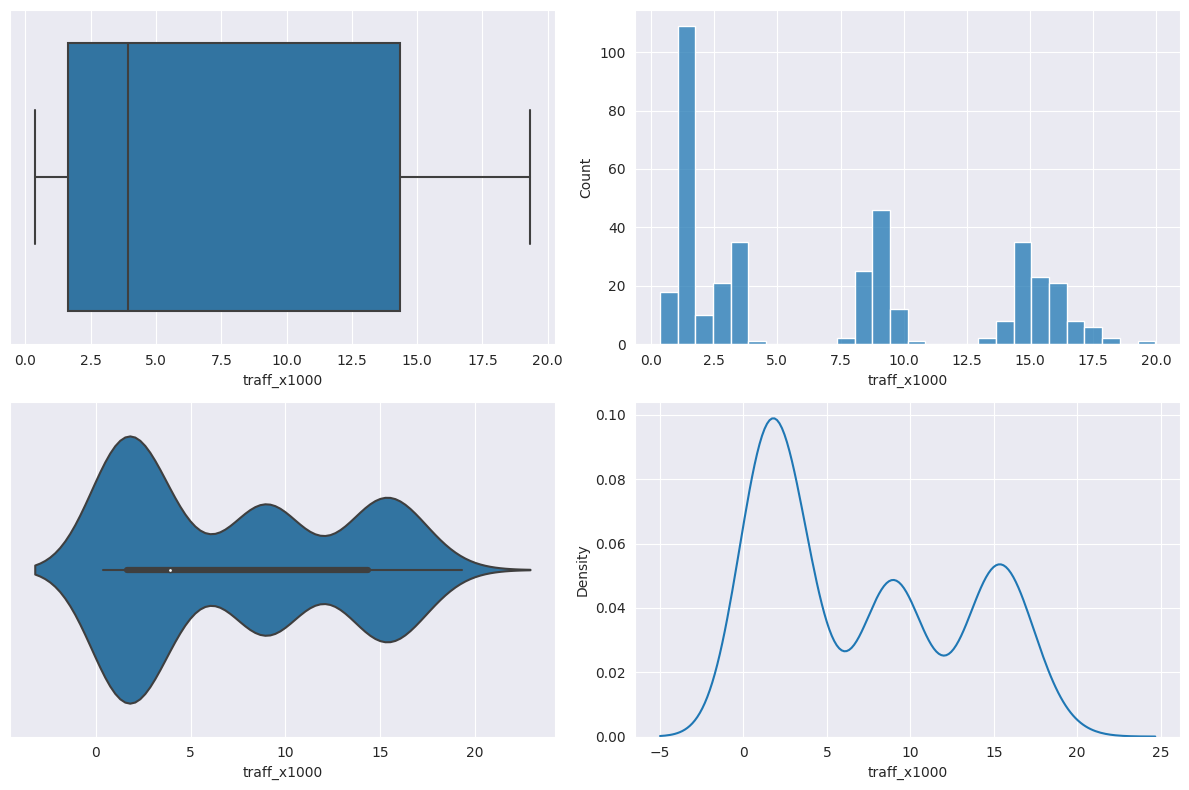

In [15]:
fig, axs = plt.subplots(2,2, figsize=(12,8)) #create grid
sns.boxplot(data=df_int, x='traff_x1000', orient='h', ax=axs[0,0])
sns.histplot(data=df_int,x='traff_x1000', binwidth=0.7, ax=axs[0,1])
sns.violinplot(data=df_int,x='traff_x1000', ax=axs[1,0])
sns.kdeplot(data=df_int, x='traff_x1000', ax=axs[1,1])
plt.tight_layout()

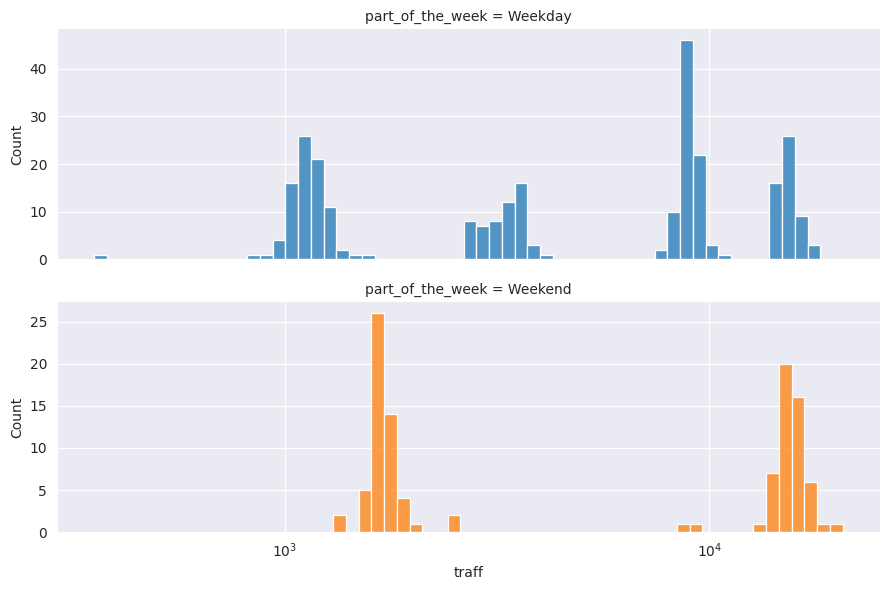

In [16]:
g = sns.FacetGrid(df_int, sharey=False, row='part_of_the_week',  hue='part_of_the_week',height=3, aspect=3)
g.map_dataframe(sns.histplot, x='traff', log_scale=True, binwidth=0.03)

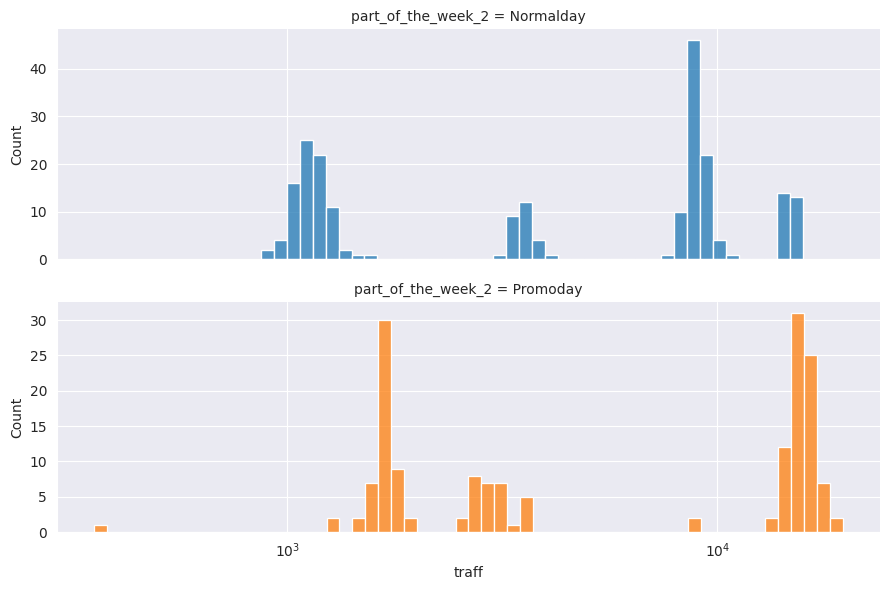

In [17]:
g = sns.FacetGrid(df_int, sharey=False, row='part_of_the_week_2',  hue='part_of_the_week_2',height=3, aspect=3)
g.map_dataframe(sns.histplot, x='traff', log_scale=True, binwidth=0.03)

In [18]:
df_int['two_week_lag_traff'] = df_int['traff'].shift(periods=14, fill_value = 0) # We create a lagging variable of two weeks
df_int ['two_week_lag_traff_x1000']= df_int['two_week_lag_traff']/1000

In [19]:
df_int.head(16)

,CODIGO,traff,qty,DELAY,traff_x1000,qty_x1000,part_of_the_week,part_of_the_week_2,two_week_lag_traff,two_week_lag_traff_x1000
FECHA,,,,,,,,,,
2022-11-01,1,9798,810163,155,9.798,810.163,Weekday,Normalday,0,0.000
2022-11-01,1,1419,80677,139,1.419,80.677,Weekday,Normalday,0,0.000
2022-11-02,1,8928,743973,187,8.928,743.973,Weekday,Normalday,0,0.000
2022-11-02,1,1238,70199,161,1.238,70.199,Weekday,Normalday,0,0.000
2022-11-03,1,8709,728152,165,8.709,728.152,Weekday,Normalday,0,0.000
2022-11-03,1,1147,65234,146,1.147,65.234,Weekday,Normalday,0,0.000
2022-11-04,1,16132,1260035,145,16.132,1260.035,Weekday,Promoday,0,0.000
2022-11-04,1,3541,198094,129,3.541,198.094,Weekday,Promoday,0,0.000
2022-11-05,1,15359,1281010,162,15.359,1281.010,Weekend,Promoday,0,0.000


<Axes: xlabel='two_week_lag_traff_x1000', ylabel='traff_x1000'>

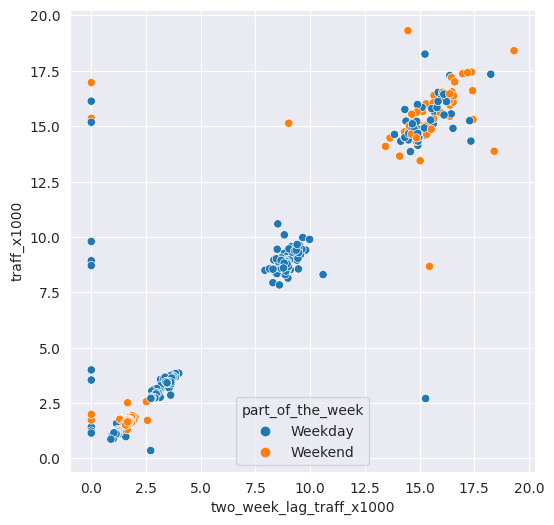

In [20]:
plt.figure(figsize=(6,6)) 
sns.scatterplot(data=df_int, x='two_week_lag_traff_x1000', y='traff_x1000', hue='part_of_the_week')

<Axes: xlabel='qty_x1000', ylabel='traff_x1000'>

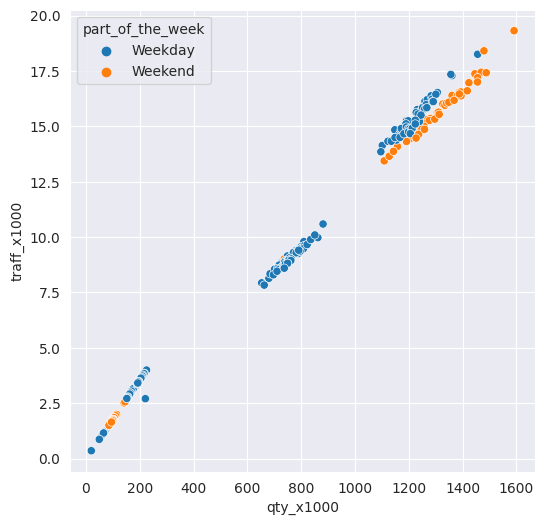

In [ ]:
plt.figure(figsize=(6,6)) 
sns.scatterplot(data=df_int, x='qty_x1000', y='traff_x1000', hue='part_of_the_week')

In [21]:
df_int.describe()

,CODIGO,traff,qty,DELAY,traff_x1000,qty_x1000,two_week_lag_traff,two_week_lag_traff_x1000
count,386.0,386.000000,3.860000e+02,386.000000,386.000000,386.000000,386.000000,386.000000
mean,1.0,7215.095855,5.692829e+05,165.963731,7.215096,569.282876,6989.225389,6.989225
std,0.0,5875.968944,5.018571e+05,81.151798,5.875969,501.857137,5925.020283,5.925020
min,1.0,356.000000,2.016400e+04,127.000000,0.356000,20.164000,0.000000,0.000000
25%,1.0,1629.000000,9.235775e+04,145.000000,1.629000,92.357750,1510.750000,1.510750
50%,1.0,3924.500000,2.232240e+05,154.000000,3.924500,223.224000,3668.000000,3.668000
75%,1.0,14329.750000,1.148582e+06,167.000000,14.329750,1148.582250,14274.000000,14.274000
max,1.0,19319.000000,1.590954e+06,1277.000000,19.319000,1590.954000,19319.000000,19.319000
